In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/mobile_dataset.csv')
df.head()

C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
df.duplicated().sum()

0

# Univariate selection

In [3]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [4]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [5]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
df.shape

(2000, 21)

In [8]:
##Apply selectkbest algo with chi squre 
ordered_features=SelectKBest(score_func=chi2,k=20)
orderd_feature=ordered_features.fit(X,y)

In [9]:
orderd_feature

SelectKBest(k=20, score_func=<function chi2 at 0x0000019C22FD55E0>)

In [10]:
orderd_feature.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [11]:
dfscore=pd.DataFrame(orderd_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns,columns=["X_feature"])

In [12]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [13]:
dfcolumns

,X_feature
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [14]:
feature_rank=pd.concat([dfscore,dfcolumns],axis=1)

In [15]:
feature_rank

,Score,X_feature
0,14129.866576,battery_power
1,0.723232,blue
2,0.648366,clock_speed
3,0.631011,dual_sim
4,10.135166,fc
5,1.521572,four_g
6,89.839124,int_memory
7,0.745820,m_dep
8,95.972863,mobile_wt
9,9.097556,n_cores


In [16]:
feature_rank.nlargest(10,"Score")

,Score,X_feature
13,931267.519053,ram
11,17363.569536,px_height
0,14129.866576,battery_power
12,9810.586750,px_width
8,95.972863,mobile_wt
6,89.839124,int_memory
15,16.480319,sc_w
16,13.236400,talk_time
4,10.135166,fc
14,9.614878,sc_h


# feature importance
This technique gives you a score for each feature of your the higher the score more relevant it is

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [18]:
  print(model.feature_importances_)

[0.0608601  0.01978582 0.03364847 0.01890007 0.03268072 0.01837261
 0.03464112 0.03332565 0.0366349  0.03280536 0.03381978 0.04763337
 0.04813948 0.39589131 0.03291152 0.03333569 0.03428653 0.01456616
 0.01767741 0.02008393]


In [19]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)

<AxesSubplot:>

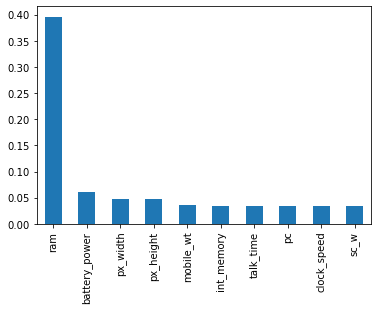

In [20]:
ranked_features.nlargest(10).plot(kind="bar")

In [21]:
ranked_features

battery_power    0.060860
blue             0.019786
clock_speed      0.033648
dual_sim         0.018900
fc               0.032681
four_g           0.018373
int_memory       0.034641
m_dep            0.033326
mobile_wt        0.036635
n_cores          0.032805
pc               0.033820
px_height        0.047633
px_width         0.048139
ram              0.395891
sc_h             0.032912
sc_w             0.033336
talk_time        0.034287
three_g          0.014566
touch_screen     0.017677
wifi             0.020084
dtype: float64

# Correlation

<AxesSubplot:>

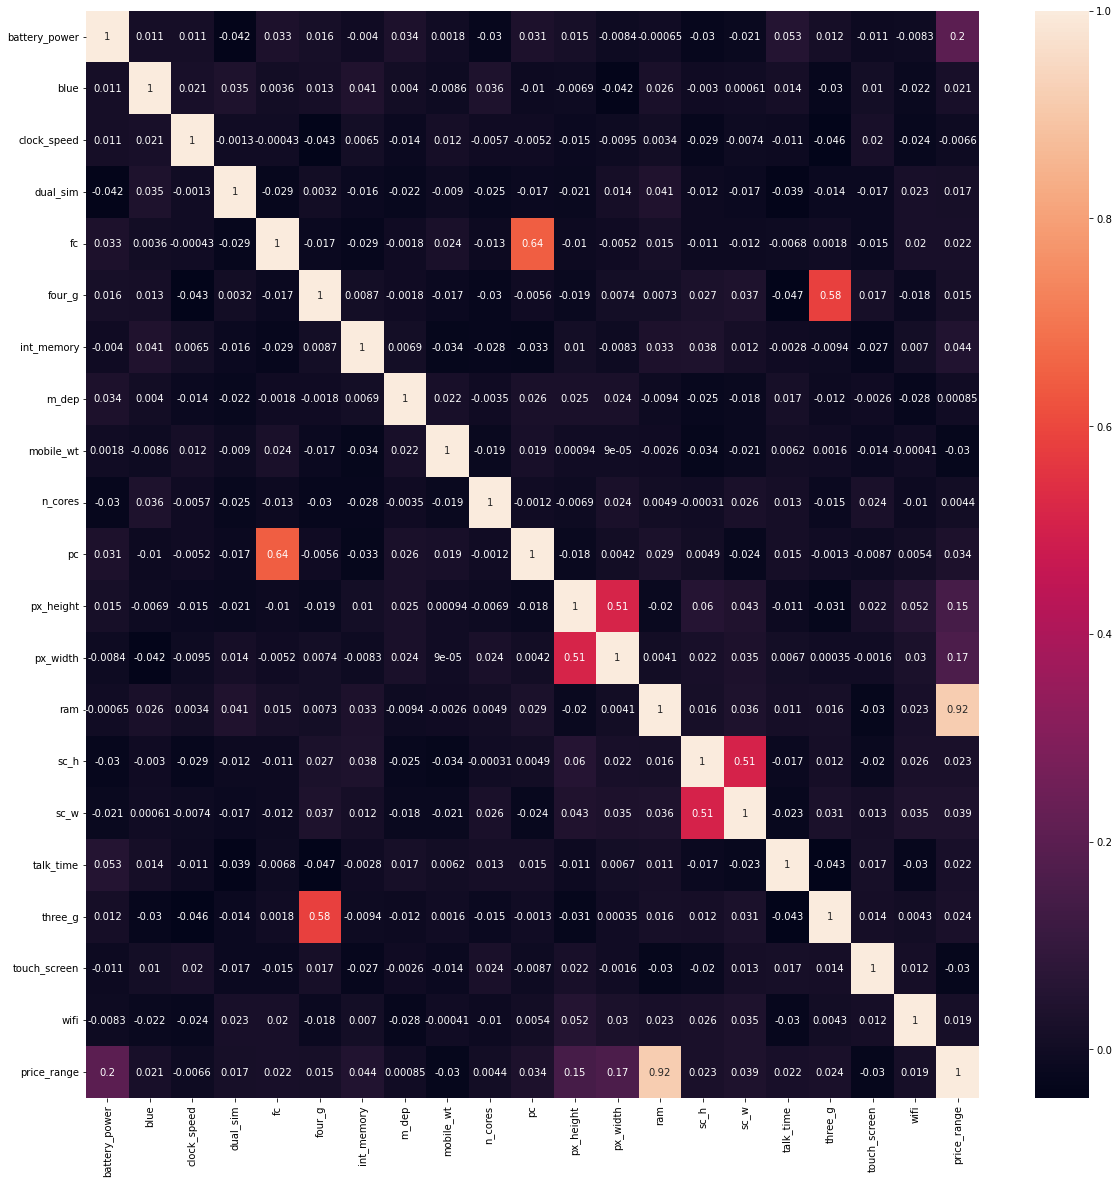

In [22]:
import seaborn as sns
corr=df.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [23]:
top_features

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

####  Remove the correlation

In [24]:
threshold=.5

In [25]:
#find and remove correlated features
def correlation(dataset,threshold):
    col_corr=set()#set of all the names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [26]:
correlation(df.iloc[:,:-1],threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

# Information gain

In [27]:
from sklearn.feature_selection import mutual_info_classif

In [28]:
mutual_info_value=mutual_info_classif(X,y)

In [29]:
nutual_data=pd.Series(mutual_info_value,index=X.columns)

In [30]:
nutual_data.sort_values(ascending=False)

ram              0.848842
px_height        0.025857
battery_power    0.025243
px_width         0.024676
mobile_wt        0.017704
fc               0.017164
n_cores          0.016120
wifi             0.006042
sc_w             0.003948
three_g          0.002246
m_dep            0.000000
int_memory       0.000000
blue             0.000000
four_g           0.000000
dual_sim         0.000000
clock_speed      0.000000
sc_h             0.000000
talk_time        0.000000
touch_screen     0.000000
pc               0.000000
dtype: float64